In [1]:
import sys
import sqlalchemy
import config
import pandas as pd
import art
import psycopg2
import jupyterlab
import ipywidgets
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly
import numpy as np
import datetime
from dbcontext import Context
from jupyter_service import JupyterService
art.tprint(config.name, "big")
print(sys.version, config.version, jupyterlab.__version__, plotly.__version__, ipywidgets.__version__)

 _____   _____   _____  _____   _____ 
|_   _| / ____| / ____||  __ \ |_   _|
  | |  | (___  | |     | |__) |  | |  
  | |   \___ \ | |     |  _  /   | |  
 _| |_  ____) || |____ | | \ \  _| |_ 
|_____||_____/  \_____||_|  \_\|_____|
                                      
                                      

3.12.0 (tags/v3.12.0:0fb18b0, Oct  2 2023, 13:03:39) [MSC v.1935 64 bit (AMD64)] 0.1.0.Alpha 4.2.5 5.24.1 8.1.5


In [2]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
print(config.connection_string)
context = Context()
context.create(echo=False)
service = JupyterService(context)

postgresql://postgres:sa@localhost:5432/iscri


In [58]:
actor1_code='ISR'
actor2_code='PSE'
df = service.get_iscris_by_codes(actor1_code=actor1_code, actor2_code=actor2_code)
#df["year_month"]=df.year.astype(str) + "-" + df.month.astype(str)
df["year_month"]=df.apply(lambda row: f"{row.year}-{row.month:02d}", axis=1) 
df["date"]=df.apply(lambda row: datetime.date(row.year, row.month, 1), axis=1) 
df

SELECT * FROM iscri WHERE actor1_code = 'ISR' AND actor2_code = 'PSE' order by year, month


,id,year,month,actor1_code,actor2_code,risk,risk3,risk4,risk_date,iscri,iscri3,iscri4,iscri_date,year_month,date
0,72,2015,1,ISR,PSE,0.272132,0.153322,0.118810,2024-10-19 11:16:58.810363,0.272132,0.153322,0.118810,2024-10-19 11:17:02.616162,2015-01,2015-01-01
1,1787,2015,2,ISR,PSE,0.441884,0.313529,0.128355,2024-10-19 11:16:59.149494,0.686803,0.451519,0.235284,2024-10-19 11:25:36.515152,2015-02,2015-02-01
2,3493,2015,3,ISR,PSE,0.425725,0.276196,0.149528,2024-10-19 11:16:59.495207,1.043847,0.682563,0.361284,2024-10-19 11:25:37.078040,2015-03,2015-03-01
3,5353,2015,4,ISR,PSE,0.319206,0.108301,0.210905,2024-10-19 11:16:59.858927,1.258668,0.722608,0.536060,2024-10-19 11:25:37.857729,2015-04,2015-04-01
4,7240,2015,5,ISR,PSE,0.332867,0.163388,0.169479,2024-10-19 11:17:00.187737,1.465669,0.813736,0.651933,2024-10-19 11:25:38.749440,2015-05,2015-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,1155697,2024,4,ISR,PSE,0.412630,0.184450,0.228180,2024-10-21 08:57:45.156616,4.505240,1.888528,2.616713,2024-10-21 08:58:02.284392,2024-04,2024-04-01
112,1157084,2024,5,ISR,PSE,0.497685,0.226170,0.271516,2024-10-21 08:57:45.306801,4.552402,1.925845,2.626557,2024-10-21 08:58:03.483996,2024-05,2024-05-01
113,1158514,2024,6,ISR,PSE,0.468727,0.190677,0.278050,2024-10-21 08:57:45.449848,4.565888,1.923937,2.641951,2024-10-21 08:58:04.725884,2024-06,2024-06-01
114,1159748,2024,7,ISR,PSE,0.430332,0.140565,0.289768,2024-10-21 08:57:45.582251,4.539632,1.872108,2.667524,2024-10-21 08:58:05.965571,2024-07,2024-07-01


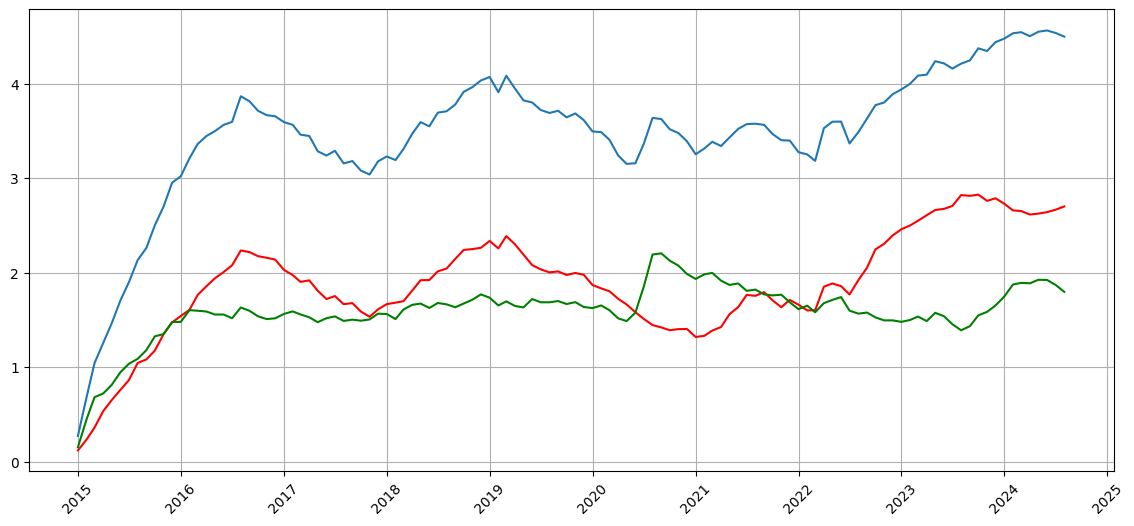

In [59]:
plt.figure(figsize=(14,6))
plt.xticks(rotation=45)
plt.grid()
plt.plot(df.date, df.iscri)
plt.plot(df.date, df.iscri4, color="red")
plt.plot(df.date, df.iscri3, color="green")
# plt.ylim(1.4,1.8)

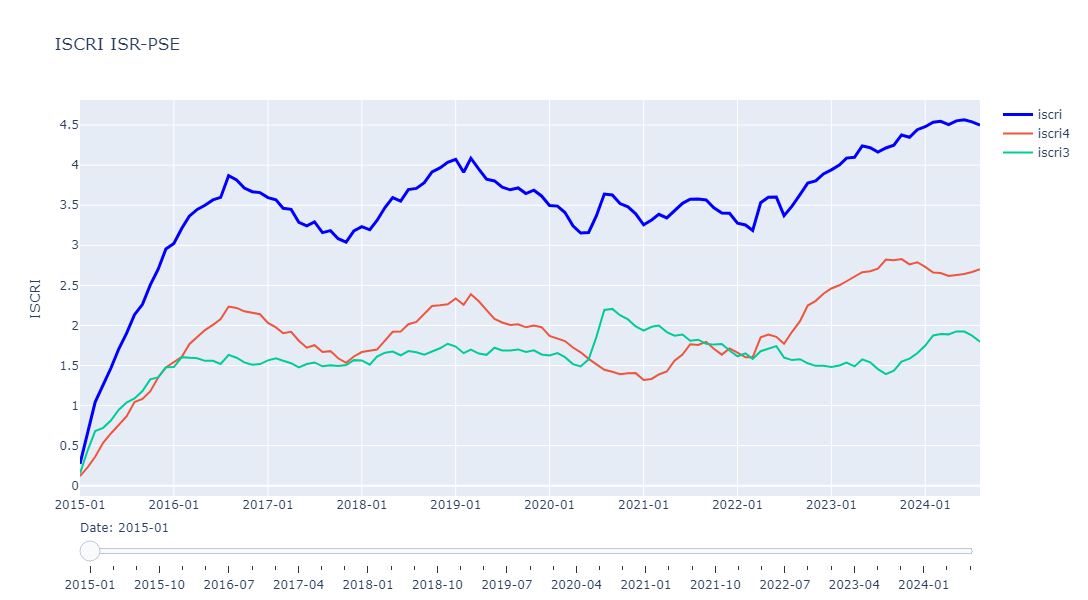

In [65]:
fig = go.Figure()

for step in np.arange(len(df)):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#0000ff", width=3),
            name="iscri",
            x=df.date,
            y=df.iscri[step:],
        ))
    fig.add_trace(
        go.Scatter(
            visible=False,
            # line=dict(color="#00CED1", width=6),
            name="iscri4",
            x=df.date,
            y=df.iscri4[step:],
        ))
    fig.add_trace(
        go.Scatter(
            visible=False,
            # line=dict(color="#00CED1", width=6),
            name="iscri3",
            x=df.date,
            y=df.iscri3[step:],
        ))
fig.data[0].visible = True
fig.data[1].visible = True
fig.data[2].visible = True

steps = []
for index, row in list(df.iterrows())[::3]:
    step = dict(
        method="restyle",
        args=[{"visible": [False] * len(fig.data)},
              # {"title": f"Date: {row['year']}-{row['month']:02d}"},
             ],
        label=f"{row['date'].year}-{row['date'].month:02d}",
    )
    step["args"][0]["visible"][index] = True
    step["args"][0]["visible"][index+1] = True
    step["args"][0]["visible"][index+2] = True
    steps.append(step)
    
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Date: "},
    # pad={"t": len(df)},
    steps=steps
)]

fig.update_layout(
    sliders=sliders,
    height=600,
    title=f"ISCRI {actor1_code}-{actor2_code}",
    # xaxis_title="Date",
    yaxis_title="ISCRI",
    # legend_title="Legend",
    xaxis=dict(tickformat="%Y-%m")
)
#fig.update_yaxes(range=[1.4, 1.8])
fig.write_html("data/out.html")
fig.show()

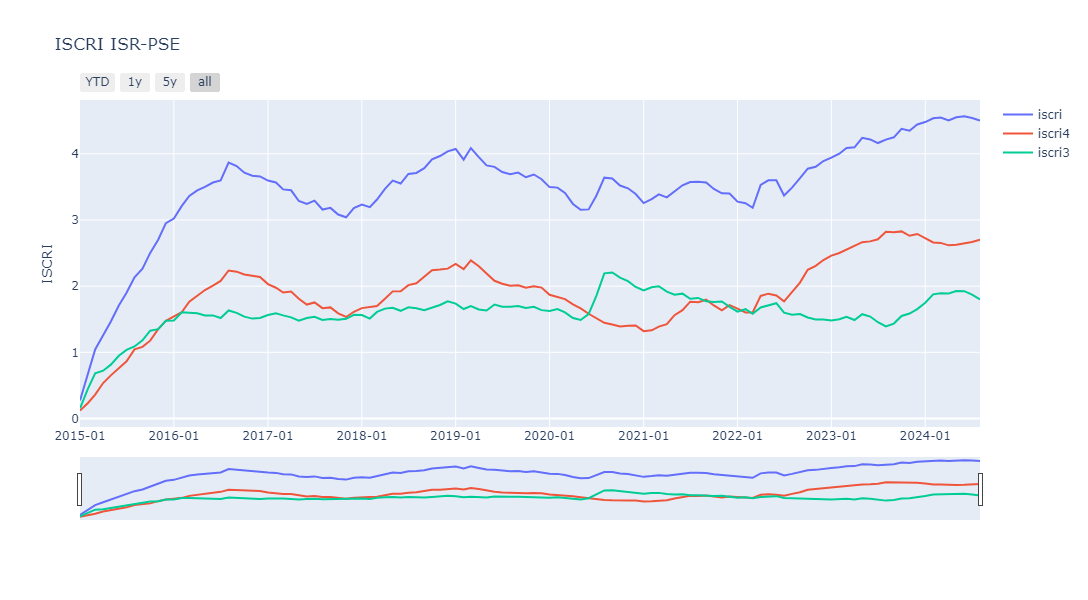

In [61]:
import plotly.graph_objects as go

import pandas as pd

# Load data
# df = pd.read_csv(
#     "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv")
# df.columns = [col.replace("AAPL.", "") for col in df.columns]

# Create figure
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df.date,
        y=df.iscri,
        name="iscri",
        line=dict(color="#0000ff", width=3),
    )
)

fig.add_trace(
    go.Scatter(
        x=df.date,
        y=df.iscri4,
        name="iscri4",
    )
)

fig.add_trace(
    go.Scatter(
        x=df.date,
        y=df.iscri3,
        name="iscri3",
    )
)

# Set title
fig.update_layout(
    height=600,
    title=f"ISCRI {actor1_code}-{actor2_code}",
    yaxis_title="ISCRI",
    xaxis=dict(tickformat="%Y-%m")
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(count=5,
                     label="5y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True,
            # thickness=0.1
        ),
        type="date"
    )
)

fig.show()